In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['CONFIG_DIR'] = "/content/gdrive/My Drive/Project"
%cd /content/gdrive/My Drive/Project
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Project
kitti/  output/  readme.txt


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

image_path = 'kitti/testing/upload/1.png'

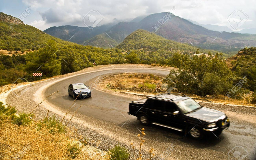

In [4]:
from google.colab.patches import cv2_imshow

resized_shape = (160,256)
image = cv2.imread(image_path)
test_img = cv2.resize(image,(resized_shape[1],resized_shape[0]))
img= test_img.copy()
cv2_imshow(test_img)


In [5]:
test_img
test_img.shape

(160, 256, 3)

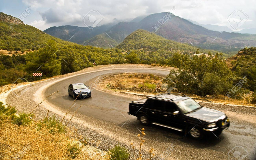

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

In [7]:
# load json and create model
json_file = open('output/model/model_car.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_car = model_from_json(loaded_model_json)
# load weights into new model
model_car.load_weights("output/model/model_car.h5")
print("Loaded model from disk")

# load json and create model
json_file = open('output/model/model_pedestrian.json', 'r',encoding='utf-8-sig')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model_pedestrian = model_from_json(loaded_model_json)
# load weights into new model
model_pedestrian.load_weights("output/model/model_pedestrian.h5")
print("Loaded model from disk")




Loaded model from disk
Loaded model from disk


In [8]:
test_img

array([[[203, 182, 155],
        [203, 182, 155],
        [203, 182, 155],
        ...,
        [249, 247, 246],
        [247, 245, 244],
        [244, 242, 241]],

       [[202, 181, 154],
        [202, 181, 154],
        [203, 182, 155],
        ...,
        [247, 245, 244],
        [246, 244, 243],
        [245, 243, 242]],

       [[202, 181, 154],
        [204, 183, 156],
        [203, 182, 155],
        ...,
        [244, 242, 241],
        [245, 243, 242],
        [244, 242, 241]],

       ...,

       [[ 34,  91, 123],
        [ 31,  97, 132],
        [ 99, 175, 212],
        ...,
        [ 75,  89,  95],
        [ 70,  80,  87],
        [ 63,  68,  77]],

       [[ 18,  71, 107],
        [ 23,  89, 127],
        [ 57, 139, 176],
        ...,
        [ 76,  86,  93],
        [ 60,  66,  73],
        [ 45,  51,  57]],

       [[ 24,  96, 138],
        [  6,  77, 120],
        [ 15,  90, 138],
        ...,
        [ 65,  73,  80],
        [ 52,  55,  63],
        [ 40,  47,  49]]

In [9]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape


(1, 160, 256, 3)

In [10]:
from google.colab.patches import cv2_imshow

pred_all_car= model_car.predict(test_img)
np.shape(pred_all_car)

pred_all_pedestrian= model_pedestrian.predict(test_img)
np.shape(pred_all_pedestrian)



(1, 160, 256, 1)

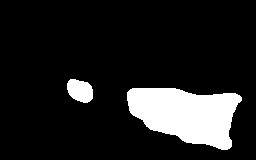

In [11]:
x = np.array(255*pred_all_car[0],dtype=np.uint8)
cv2_imshow(x)


Prediction


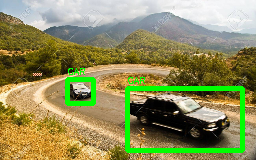

In [12]:
from google.colab.patches import cv2_imshow


im_pred_car = np.array(255*pred_all_car[0],dtype=np.uint8)
rgb_mask_box= im_pred_car
ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
img2 = img.copy()
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(rgb_mask_box, contours, -1, (0,255,0), 3)
for c in contours:
  rect = cv2.boundingRect(c)
  x,y,w,h = rect
  cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),3)
  cv2.putText(img2,'CAR',(x,y-5),0,0.3,(0,255,0))



im_pred_pedestiran = np.array(255*pred_all_pedestrian[0],dtype=np.uint8)
rgb_mask_box= im_pred_pedestiran
ret,thresh = cv2.threshold(rgb_mask_box,127,255,0)
img3 = img2.copy()
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(rgb_mask_box, contours, -1, (255,0,0), 3)
for c in contours:
  rect = cv2.boundingRect(c)
  x,y,w,h = rect
  cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),3)
  cv2.putText(img3,'PEDESTRIAN',(x,y-5),0,0.3,(255,0,0))


print("Prediction")
cv2_imshow(img3)

